#### Calculate derivatives 

#### Symbolic differentiation by sympy
Find the minimum of the function $y=x^2-2x$

In [7]:
from sympy import symbols, diff, solve
x = symbols('x')
f = x**2-2*x
d = diff(f)
x_tp = solve(d)
print(x_tp)
y_tp = f.subs({x:x_tp[0]})
print(y_tp)
nature = diff(f,x,2).subs({x:x_tp[0]})
print(nature)

[1]
-1
2


#### Numerical differentiation by autograd

In [1]:
from autograd import grad
 
def f(w):
    return w**2 #Note: w*w will induce a warning
 
# First-order derivative (gradient)
dfdw = grad(f)
d1 = dfdw(3.0)  # First derivative at w = 3.0
 
# Second-order derivative
dfdw2 = grad(dfdw)
d2 = dfdw2(3.0)  # Second derivative at w = 3.0
 
# Third-order derivative
dfdw3 = grad(dfdw2)
d3 = dfdw3(3.0)  # Third derivative at w = 3.0
 
# Output the results
print(f"First derivative at w=3.0: {d1}")
print(f"Second derivative at w=3.0: {d2}")
print(f"Third derivative at w=3.0: {d3}")


First derivative at w=3.0: 6.0
Second derivative at w=3.0: 2.0
Third derivative at w=3.0: 0.0


#### Tangent of function $f(x) = sin(x)e^{-0.1x^2}$

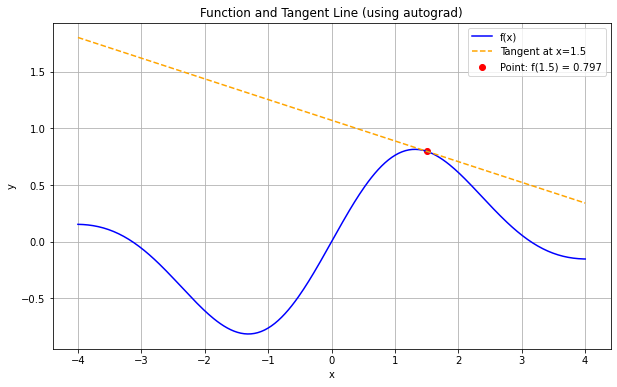

f(1.5)         = 0.79652
f'(1.5)        = -0.18247
f''(1.5)       = -0.91802


In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Step 1: Define the function
def f(x):
    return np.sin(x) * np.exp(-0.1 * x**2)

# Step 2: Define first and second derivatives using autograd
f_prime = grad(f)        # First derivative
f_double_prime = grad(f_prime)  # Second derivative

# Step 3: Choose a point to analyze (e.g., x = 1.5)
x0 = 1.5
y0 = f(x0)
slope = f_prime(x0)

# Tangent line: y = f(x0) + f'(x0)(x - x0)
def tangent_line(x):
    return y0 + slope * (x - x0)

# Step 4: Plot the function, its tangent, and annotate the slope
x_vals = np.linspace(-4, 4, 300)
y_vals = f(x_vals)
tangent_vals = tangent_line(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color='blue')
plt.plot(x_vals, tangent_vals, label="Tangent at x=1.5", color='orange', linestyle='--')
plt.scatter([x0], [y0], color='red', label=f"Point: f({x0}) = {y0:.3f}")
plt.title("Function and Tangent Line (using autograd)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Show numeric derivative values
print(f"f({x0})         = {y0:.5f}")
print(f"f'({x0})        = {slope:.5f}")
print(f"f''({x0})       = {f_double_prime(x0):.5f}")


#### Partial derivatives 

In [2]:
from autograd import grad
 
# Define the function ff(x, y)
def ff(x, y):
    return x * y
 
# Partial derivative with respect to x (first argument)
dfdw1 = grad(ff, 0)
 
# Partial derivative with respect to y (second argument)
dfdw2 = grad(ff, 1)
 
# Evaluate partial derivatives at specific points
dwd1 = dfdw1(1.0, 2.0)
dwd2 = dfdw2(1.0, 2.0)
 
# Print results
print(f"Partial derivative with respect to x at (1.0, 2.0): {dwd1}")
print(f"Partial derivative with respect to y at (1.0, 2.0): {dwd2}")


Partial derivative with respect to x at (1.0, 2.0): 2.0
Partial derivative with respect to y at (1.0, 2.0): 1.0


#### Integration 

In [3]:
# Import the required function from scipy
from scipy.integrate import quad
 
# Define the function to integrate
def f(x):
    return x**3
 
# Perform the definite integration from 0 to 1
result, error = quad(f, 0.0, 1.0)
 
# Display the results
print(f"The integral of x^3 from 0 to 1 is: {result:.5f}")
print(f"Estimated error in the computation: {error:.5e}")


The integral of x^3 from 0 to 1 is: 0.25000
Estimated error in the computation: 2.77556e-15


#### Solving differential equations $$\frac{dy}{dx} = -\frac{x}{y}$$

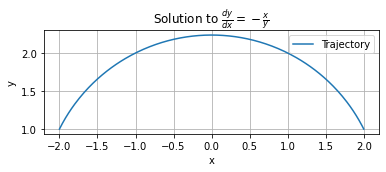

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
 
# Define the differential equation
def dy_dx(y, x):
    return -x / y
 
# Define the range of x values
xs = np.linspace(-2, 2, 200)
 
# Initial condition
y0 = 1.0
 
# Solve the differential equation
ys = odeint(dy_dx, y0, xs).flatten()
 
# Plot the results
plt.figure(figsize=(6, 6))  # Make the plot square
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xs, ys, label='Trajectory')
plt.title(r'Solution to $\frac{dy}{dx} = -\frac{x}{y}$')
plt.grid()
 
# Enforce equal scaling for the x and y axes
plt.gca().set_aspect('equal', adjustable='box')
 
# Add a legend
plt.legend()
 
# Show the plot
plt.show() 


#### Solving second-order differential equations $$\ddot{y}+2\dot{y}+2y = cos(2x)$$  Let $y_1 = y$ and $y_2 = \dot{y}$: \begin{eqnarray*}\dot{y}_1 &=& y_2 \\ \dot{y}_2 &=& -2y_2-2y_1+cos(2x)\end{eqnarray*}

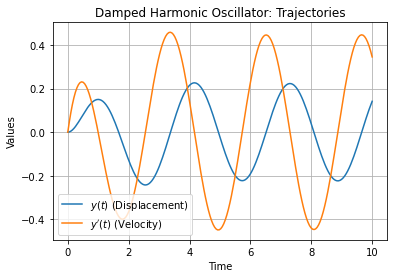

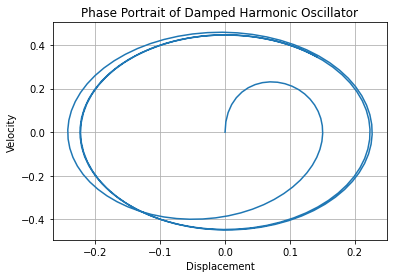

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
 
def dU_dx(U, x):
    # U is a vector [y1, y2] where y1 = displacement and y2 = velocity
    return [U[1], -2 * U[1] - 2 * U[0] + np.cos(2 * x)]
 
# Initial conditions and time range
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
 
# Extract solutions
ys, ys2 = Us[:, 0], Us[:, 1]
 
# Plot trajectories
plt.plot(xs, ys, label='$y(t)$ (Displacement)')
plt.plot(xs, ys2, label="$y'(t)$ (Velocity)")
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Damped Harmonic Oscillator: Trajectories')
plt.legend()
plt.grid()
plt.show()
 
# Plot phase portrait
plt.plot(ys, ys2)
plt.xlabel('Displacement')
plt.ylabel('Velocity')
plt.title('Phase Portrait of Damped Harmonic Oscillator')
plt.grid()
plt.show()


#### Solving difference equations 
$$
x(k+1) = \begin{bmatrix} 3 & -5 \\ 1 & -1\end{bmatrix} x(k)
$$ where the initial state is $x_0 = [0 \ 1]$. 

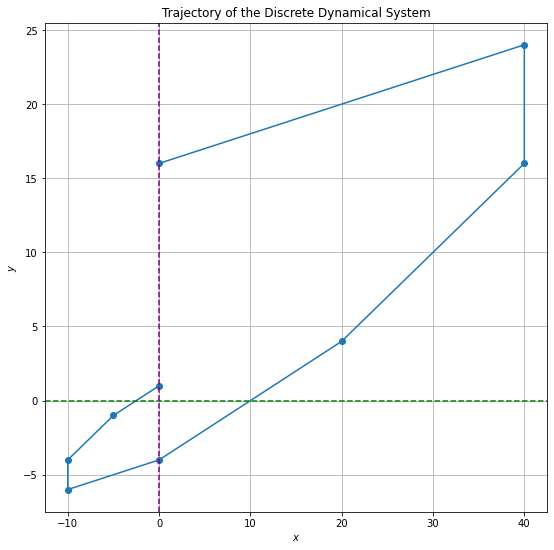

In [7]:
# Discrete dynamic system: Example with complex eigenvalues
import numpy as np
import matplotlib.pyplot as plt
 
# Define the system matrix and initial state
A = np.array([[3, -5], [1, -1]])
x0 = np.array([0, 1])  # Initial state
 
# Number of steps to compute
n_steps = 8
 
# Store all states
X = x0.reshape(1, -1)  # Reshape to 2D for stacking
 
# Iteratively compute the states
for _ in range(n_steps):
    x0 = A @ x0  # Matrix-vector multiplication
    X = np.vstack((X, x0))  # Append new state
 
# Plot the trajectory
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(X[:, 0], X[:, 1], '-o')  # Trajectory
ax.axhline(y=0, color='green', linestyle='--')  # Horizontal axis
ax.axvline(x=0, color='purple', linestyle='--')  # Vertical axis
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Trajectory of the Discrete Dynamical System')
ax.grid()
plt.show()
